# Programa Ingenias+ Data Science

Un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

Si bien la recoleccion de los datos es uno de los pasos más importante de cualquier proyecto, el Data Scientist puede tener desde mucho hasta nada de control en esta etapa. Muy frecuentemente, los data scientist tienen que trabajar con datos guardados en archivos excel, o csv que proveen los clientes.

De cualquier manera, poder leer estos datos, organizarlos, darles el formato correcto, inspeccionarlos y manipularlos es una tarea escencial y requiere librerias especiales, que veremos a lo largo de esta Notebook.

<font size=5>  👩🏽‍🔬 Exploración de los datos 👩🏽‍💻</font>

Una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como <font color='#1ABC9C'>_"Analisis exploratorio de datos"_</font>.

Este análisis, que es parte de nuestra etapa de exploración y procesamiento de los datos, es muy importante ya que nos permitira descubrir patrones presentes en los datos. También permitira ver aquellos datos que se alejen del comportamiento esperado.

Cuando uno inicia un proyecto de Data Science el primer impulso es saltar a ajustar un modelo de machine learning. Sin embargo, es muy probable que no podamos explicar sus resultados, o no podamos entender que debemos ajustar si no hemos realizado previamente un analisis exploratorio.

Por este motivo, nos abocaremos a explorar nuestros datos en esta Notebook.

## Primera Parte: Describiendo los datos

Imaginemos la siguiente situación: Trabajas como data scientist en una empresa que comercializa distintos productos. La empresa tiene datos de ventas del Black Friday del año pasado. Tu Team leader te provee el dataset en el archivo `blackfriday.csv` y te pide que pienses en que proyecto puede surgir de allí que tenga utilidad para la empresa.

In [ ]:
#importa pandas
import pandas as pd
import numpy as np

Recordemos que la sintaxis para poder leer un archivo csv es:
    
`df = pd.read_csv('archivo.csv', delimiter=',')`

Aunque muchas veces se omite el `delimiter` si el archivo esta separado por comas.

Lee el archivo csv `bkackfriday.csv` usando `pandas`. Guardalo en una variable llamada `blackfriday`.

In [ ]:
blackfriday = pd.read_csv('blackfriday.csv')


NameError: name 'pd' is not defined

Visualiza el DataFrame y observa cuantas filas y columnas tiene.

In [ ]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
blackfriday.shape

(67760, 12)

Nombre y tipo de datos en las columnas contenidas en `blackfriday`

In [ ]:
blackfriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,float64
Product_Category_1,float64
Product_Category_2,float64


Chequea si tiene valores faltantes y ver las filas que los tienen.

In [ ]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,1
City_Category,0
Stay_In_Current_City_Years,1
Marital_Status,2
Product_Category_1,1
Product_Category_2,21239


In [ ]:
blackfriday[blackfriday.isna().any(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,2.0,NaN,15227.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67753,1000981,P00174242,M,26-35,20.0,B,2,1.0,15.0,16.0,NaN,8347.0
67756,1000982,P00365242,F,26-35,9.0,C,4+,0.0,5.0,8.0,NaN,8666.0
67757,1000982,P00025942,F,26-35,9.0,C,4+,0.0,8.0,14.0,NaN,8026.0
67758,1000982,P00157542,F,26-35,9.0,C,4+,0.0,8.0,14.0,NaN,9974.0


In [ ]:
blackfriday[blackfriday['Gender'].isna()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


Detalles estadisticos de cada columna:

In [ ]:
blackfriday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,6.776000e+04,67759.000000,67758.000000,67759.000000,46521.000000,20613.000000,67757.000000
mean,1.002666e+06,8.150474,0.403642,5.601617,9.874465,12.709504,9295.874316
std,4.168739e+03,6.534557,0.490631,78.844613,5.076383,4.109106,4962.297657
min,1.035000e+03,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001301e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5865.000000
50%,1.002643e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,1.003902e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12044.000000
max,1.006040e+06,20.000000,1.000000,20506.000000,18.000000,18.000000,23958.000000


Podemos ver tambien que valores o categorias estan incluidas en las columnas:

In [ ]:
blackfriday["City_Category"].value_counts()

,count
City_Category,
B,28714
C,20845
A,18199
5240,1
6,1


In [ ]:
blackfriday["City_Category"].value_counts(normalize=True)

,proportion
City_Category,
B,0.423760
C,0.307630
A,0.268580
5240,0.000015
6,0.000015


In [ ]:
blackfriday["Marital_Status"].value_counts(normalize=True)

,proportion
Marital_Status,
0.0,0.596358
1.0,0.403642


In [ ]:
blackfriday['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan, '16'], dtype=object)

In [ ]:
blackfriday['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,23621
2,12562
3,11779
4+,10598
0,9198
16,1


In [ ]:
blackfriday['Stay_In_Current_City_Years'] = blackfriday['Stay_In_Current_City_Years'].str.replace('4+', '4', regex=False).astype(int)

ValueError: cannot convert float NaN to integer

In [ ]:
blackfriday[(blackfriday["City_Category"] == 'A') & (blackfriday["Marital_Status"] == 0)]["Purchase"].max()


23934.0

In [ ]:
blackfriday[(blackfriday["City_Category"] == 'A') & (blackfriday["Marital_Status"] == 0)]["Purchase"].min()


185.0

In [ ]:
blackfriday[(blackfriday["Gender"] == 'F') & (blackfriday["Marital_Status"] == 0)]["Purchase"].max()


23938.0

In [ ]:
blackfriday.groupby(by=['City_Category', 'Gender'])['Purchase'].mean()

NameError: name 'blackfriday' is not defined

In [ ]:
pd.crosstab(blackfriday["City_Category"], blackfriday["Product_Category_1"])

Product_Category_1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
City_Category,,,,,,,,,,,,,,,,,,
A,23167,4122,3277,2060,27833,3587,824,21277,64,899,4396,701,1055,308,1159,1871,81,501
B,38139,6859,5664,3408,42342,5561,1062,31311,116,1331,6834,1086,1497,409,1723,2646,181,890
C,31054,4774,4403,2328,29300,4199,579,22503,83,1153,4720,800,1073,270,1277,1972,121,622


## Parte 2: ¿Cómo visualizo mis datos?

Para poder visualizar los datos y la relación entre las distintas variables, podemos usar dos librerias: `matplotlib` y `seaborn`.

Documentación:
- [matplotlib](https://matplotlib.org/3.1.1/contents.html)
- [seaborn](https://seaborn.pydata.org/)

- Importamos la libreria `matplotlib.pyplot` como `plt`
- Importamos la libreria seaborn como `sns`

In [ ]:
#Importa las librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Veamos algunos ejemplos de distintos graficos que se pueden obtener con estas librerias.

In [ ]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,float64
Product_Category_1,float64
Product_Category_2,float64


#### Histogramas:

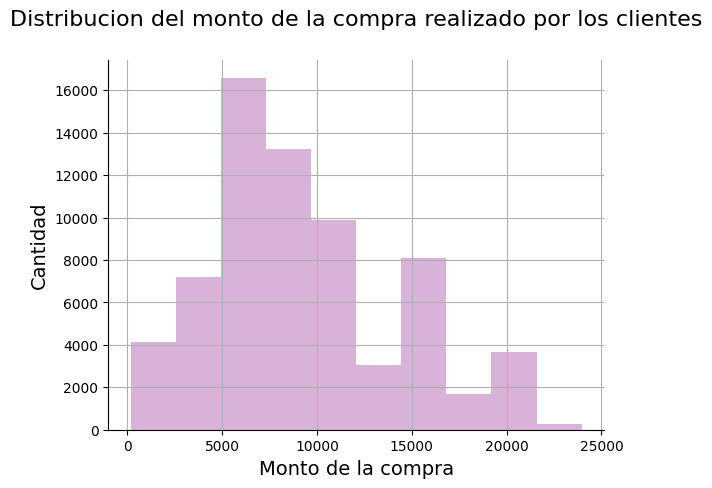

In [ ]:
# Grafico Age
plt.figure()
plt.hist(blackfriday['Purchase'].dropna(), bins=10, color="purple", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Monto de la compra", size=14)
plt.title("Distribucion del monto de la compra realizado por los clientes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()

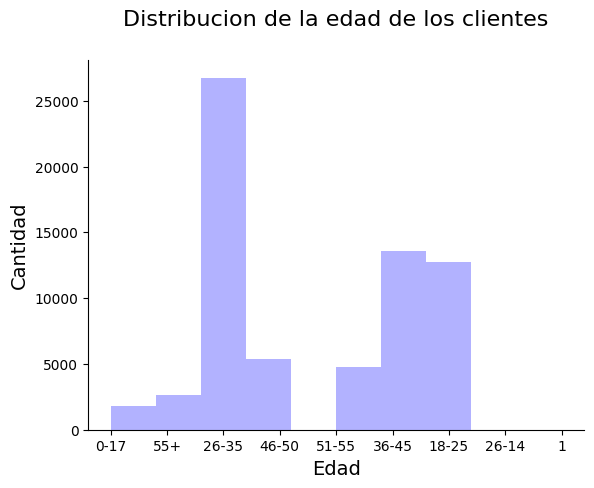

In [ ]:
# Grafico Age
plt.figure()
plt.hist(blackfriday['Age'].dropna(), bins=10, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Edad", size=14)
plt.title("Distribucion de la edad de los clientes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

Mi pagina favorita para elegir [colores](https://htmlcolorcodes.com/es/tabla-de-colores/)🎨 &nbsp;🖍

#### Distplot:

<Figure size 640x480 with 0 Axes>

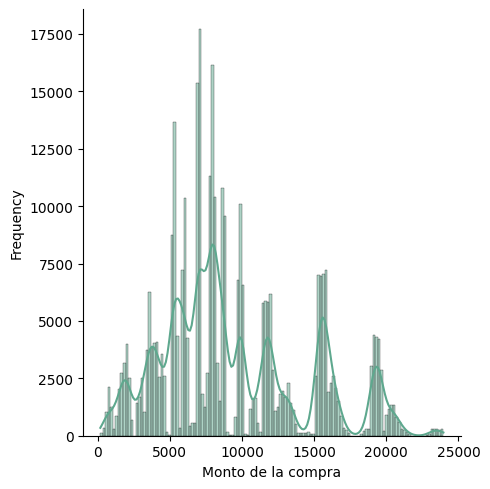

In [ ]:
plt.figure()
sns.displot(blackfriday["Purchase"], color="#5ea88e", kde=True)
plt.xlabel('Monto de la compra')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#### Boxplot:

In [ ]:
boxplot_blackfriday = blackfriday.melt(id_vars='City_Category', value_vars=['Purchase'])

In [ ]:
boxplot_blackfriday.head()

,City_Category,variable,value
0,A,Purchase,8370.0
1,A,Purchase,15200.0
2,A,Purchase,1422.0
3,A,Purchase,1057.0
4,C,Purchase,7969.0


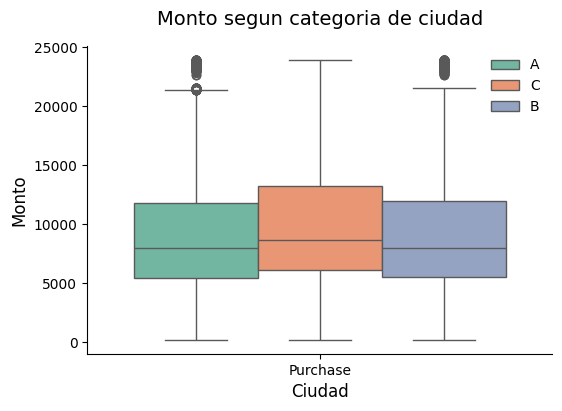

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="variable", y="value", data=boxplot_blackfriday, palette="Set2", hue='City_Category')

plt.title('Monto segun categoria de ciudad', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Ciudad', size=12)
plt.ylabel('Monto', size=12)
sns.despine()
plt.show()

#### Scaterplot:

In [ ]:
plt.figure()
sns.scatterplot(x="Age", y="Purchase",data=blackfriday, palette="spring")
sns.despine()
plt.show();

NameError: name 'blackfriday' is not defined

<Figure size 640x480 with 0 Axes>

#### Countplot

Observa como se pueden ajustar la estetica del grafico (Vale para cualquier grafico).

<ipython-input-62-0428bfeb6525>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=blackfriday.sort_values('Occupation'), palette="Set3")


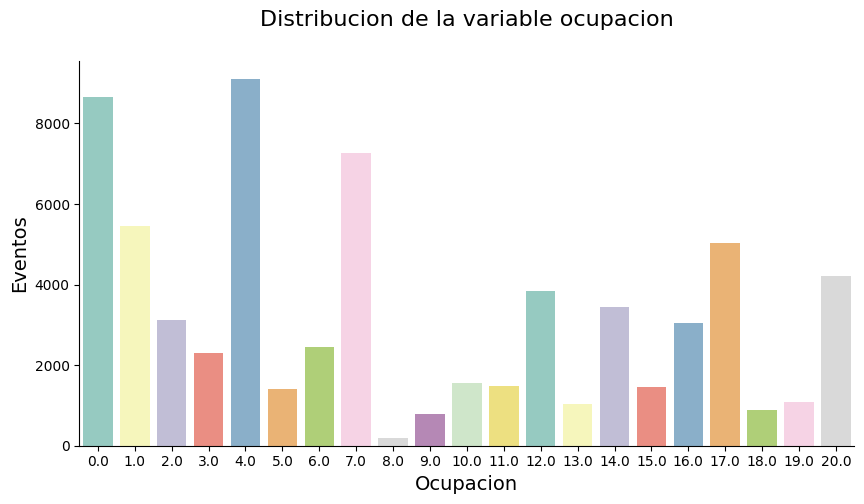

In [ ]:
plt.figure(figsize=(10,5))


sns.countplot(x="Occupation", data=blackfriday.sort_values('Occupation'), palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("Ocupacion", size=14)
plt.title("Distribucion de la variable ocupacion", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

<ipython-input-35-83a0a9d0502b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=blackfriday, palette="Set3")


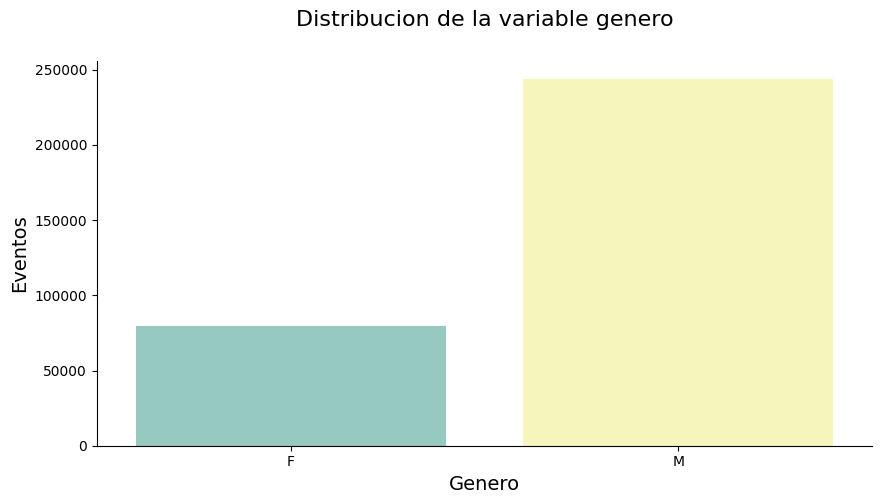

In [ ]:
plt.figure(figsize=(10,5))


sns.countplot(x="Gender", data=blackfriday, palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("Genero", size=14)
plt.title("Distribucion de la variable genero", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

#### Graficos solapados

<Figure size 640x480 with 0 Axes>

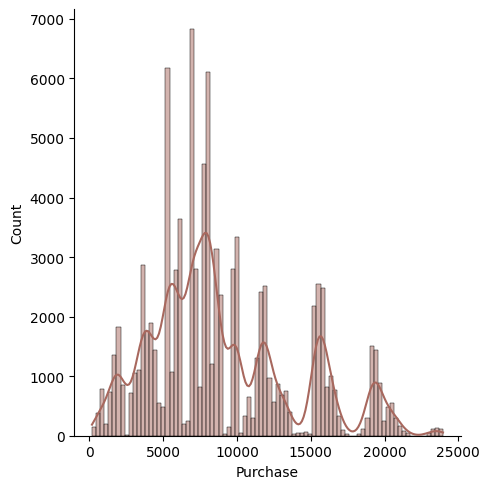

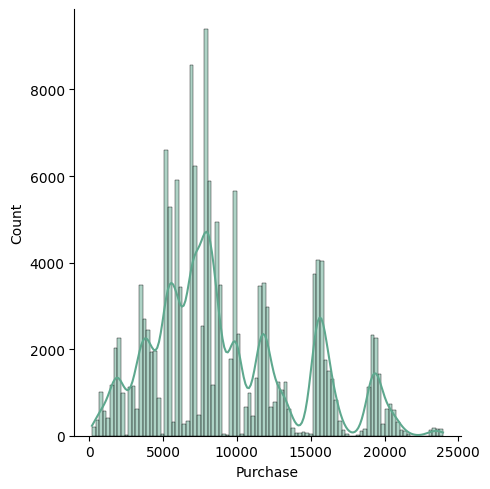

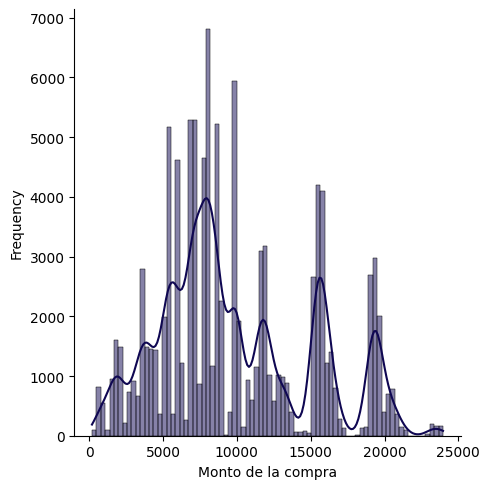

In [ ]:
plt.figure()
sns.displot(blackfriday[blackfriday['City_Category'] == 'A']["Purchase"], color="#a8685e", kde=True)
sns.displot(blackfriday[blackfriday['City_Category'] == 'B']["Purchase"], color="#5ea88e", kde=True)
sns.displot(blackfriday[blackfriday['City_Category'] == 'C']["Purchase"], color="#0f0752", kde=True)
plt.xlabel('Monto de la compra')
plt.ylabel('Frequency')
sns.despine()
plt.show();

#### Subplots

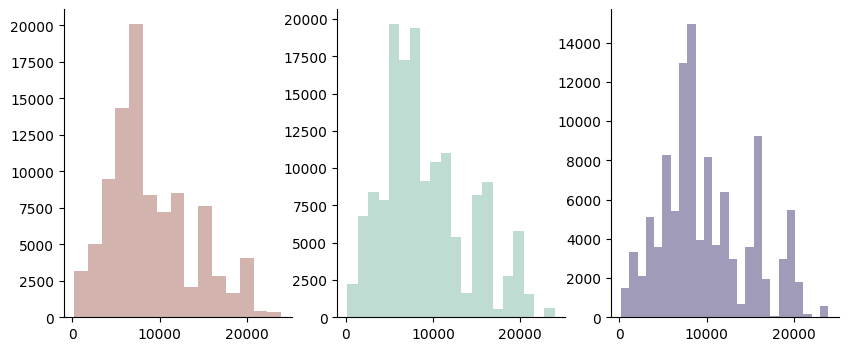

In [ ]:
# Inicio subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
# Establezco colores
colors = np.arange(959)
# primer grafico
ax[0].hist(blackfriday[blackfriday['City_Category'] == 'A']["Purchase"], color="#a8685e", alpha=0.5, bins=15)
# segundo grafico
ax[1].hist(blackfriday[blackfriday['City_Category'] == 'B']["Purchase"], color="#5ea88e", alpha=0.4, bins=20)
# tercer grafico
ax[2].hist(blackfriday[blackfriday['City_Category'] == 'C']["Purchase"], color="#0f0752", alpha=0.4,  bins=25)
# modifico primer grafico
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
# modifico segundo grafico
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
# modifico tercer grafico
ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
plt.show()

#### Pairplot

In [ ]:
blackfriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

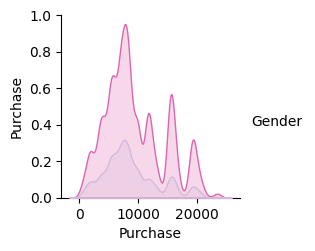

In [ ]:
sns.pairplot(blackfriday[['Stay_In_Current_City_Years', 'Age', 'Purchase', 'Gender']], hue='Gender', palette='PuRd');

In [ ]:
corr = blackfriday[['Age', 'Stay_In_Current_City_Years', 'Purchase']].corr(method = 'pearson')

ValueError: could not convert string to float: '0-17'

In [ ]:
sns.heatmap(corr, cmap='YlGnBu', annot=True);

NameError: name 'corr' is not defined

**Otros ejemplos de gráficos**: [Ejemplos en Matplotlib](https://matplotlib.org/3.1.0/gallery/index.html) y [Ejemplos en Seaborn](https://seaborn.pydata.org/examples/index.html)